<a href="https://colab.research.google.com/github/Ashishjaiswal181/Google-Colab-Programs/blob/master/Handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls "/content/gdrive/My Drive"

In [0]:
#cd "/content/gdrive/My Drive/Font"

In [0]:
#import idx2numpy
import tensorflow as tf
import sklearn
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import io
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [0]:
x=pd.read_csv('/content/gdrive/My Drive/Font/A_Z_Handwritten_Data.csv')
#x.head()

In [0]:
x.shape

(372450, 785)

In [0]:
data=x.iloc[:,1:372449]
data = np.array(data[1:], dtype=np.float)
#data

In [0]:
y=x['0']
y = np.array(y[1:], dtype=np.float)
#y

In [0]:
y.shape

(372449,)

In [0]:
#import gzip
#f = gzip.open('/content/gdrive/My Drive/Font/Surrey/EnglishHnd.gz','r')
#y = gzip.open('/content/gdrive/My Drive/Font/train-labels-idx1-ubyte.gz','r')
#image_size = 28
#num_images = 3700000

#f.read(16)
#buf = f.read(image_size * image_size * num_images)
#data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
#data = data.reshape(num_images, image_size, image_size, 1)

In [0]:
#from numpy import genfromtxt
#my_data = genfromtxt(new, delimiter=',')

In [0]:
#from PIL import Image
#im = Image.fromarray(new)
#im.save("your_file.jpeg")

In [0]:
#import matplotlib.pyplot as plt
#image = np.asarray(my_data[0].squeeze())
#plt.imshow(image)
#plt.show()

In [0]:
#image.shape  -> 28*28

In [0]:
#file = '/content/gdrive/My Drive/Font/train-images.idx3-ubyte'
#arr = idx2numpy.convert_from_file(file)
#image = np.asarray(arr[10]).squeeze()
#plt.imshow(image)
#plt.show()
#plt.imshow("Image", arr[4])

In [0]:
# Explore your dataset 
# Train_x = data
# Tarin_y = y
m_train = data.shape[0]
num_px = 28
#Dimension of x =28*28 = 784 = nx
print ("Number of training examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(data.shape))
print ("train_y shape: " + str(y.shape))

Number of training examples: 372449
Each image is of size: (28, 28, 3)
train_x shape: (372449, 784)
train_y shape: (372449,)


In [0]:
# Reshape the training and test examples 
train_x_flatten = data.reshape(data.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
#test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
#test_x = test_x_flatten/255.

print ("train_x's shape: " + str(data.shape))

train_x's shape: (372449, 784)


In [0]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [0]:
#parameters = initialize_parameters_deep([5,4,3])
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))
#Expected output
#W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
# [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 #[-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 #[-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
#b1 = [[ 0.]
# [ 0.]
 #[ 0.]
 #[ 0.]]
#W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
# [-0.01023785 -0.00712993  0.00625245 -0.00160513]
# [-0.00768836 -0.00230031  0.00745056  0.01976111]]
#b2 = [[ 0.]
# [ 0.]
# [ 0.]]

In [0]:
#Test cases for checking different functions
import numpy as np

def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return X, parameters

def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads


def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"])) # this is done on purpose to be consistent with lecture where we normally start with A0
                                        # in this implementation we started with A1, hence we bump it up by 1. 
        

In [0]:
import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

  
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ



In [0]:
#GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    #print(W.shape)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
#A, W, b = linear_forward_test_case()

#Z, linear_cache = linear_forward(A, W, b)
#print("Z = " + str(Z))
#Expected output
#Z = [[ 3.26295337 -1.23429987]]

In [0]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
#A_prev, W, b = linear_activation_forward_test_case()

#A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
#print("With sigmoid: A = " + str(A))

#A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
#print("With ReLU: A = " + str(A))
#Expected Output
#With sigmoid: A = [[0.96890023 0.11013289]]
#With ReLU: A = [[3.43896131 0.        ]]

In [0]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)

    ### END CODE HERE ###
    #print(AL.shape)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [0]:
#X, parameters = L_model_forward_test_case_2hidden()
#AL, caches = L_model_forward(X, parameters)
#print("AL = " + str(AL))
#print("Length of caches list = " + str(len(caches)))
#Expected Output
#AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
#Length of caches list = 3

In [0]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    #m = Y.shape[1]
    m=372449

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [0]:
#Y, AL = compute_cost_test_case()

#print("cost = " + str(compute_cost(AL, Y)))
#Expected Output
#cost = 0.41493159961539694

In [0]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [0]:
# Set up some test inputs
#dZ, linear_cache = linear_backward_test_case()

#dA_prev, dW, db = linear_backward(dZ, linear_cache)
#print ("dA_prev = "+ str(dA_prev))
#print ("dW = " + str(dW))
#print ("db = " + str(db))
#Expected Output
#dA_prev = [[ 0.51822968 -0.19517421]
 #[-0.40506361  0.15255393]
 #[ 2.37496825 -0.89445391]]
#dW = [[-0.10076895  1.40685096  1.64992505]]
#db = [[0.50629448]]

In [0]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [0]:
#dAL, linear_activation_cache = linear_activation_backward_test_case()

#dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
#print ("sigmoid:")
#print ("dA_prev = "+ str(dA_prev))
#print ("dW = " + str(dW))
#print ("db = " + str(db) + "\n")

#dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
#print ("relu:")
#print ("dA_prev = "+ str(dA_prev))
#print ("dW = " + str(dW))
#print ("db = " + str(db))
#Expected Output
#sigmoid:
#dA_prev = [[ 0.11017994  0.01105339]
# [ 0.09466817  0.00949723]
# [-0.05743092 -0.00576154]]
#dW = [[ 0.10266786  0.09778551 -0.01968084]]
#db = [[-0.05729622]]

#relu:
#dA_prev = [[ 0.44090989  0.        ]
# [ 0.37883606  0.        ]
# [-0.2298228   0.        ]]
#dW = [[ 0.44513824  0.37371418 -0.10478989]]
#db = [[-0.20837892]]

In [0]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [0]:
#AL, Y_assess, caches = L_model_backward_test_case()
#grads = L_model_backward(AL, Y_assess, caches)
#print_grads(grads)
#Expected Output
#dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
# [0.         0.         0.         0.        ]
# [0.05283652 0.01005865 0.01777766 0.0135308 ]]
#db1 = [[-0.22007063]
# [ 0.        ]
# [-0.02835349]]
#dA1 = [[ 0.12913162 -0.44014127]
 #[-0.14175655  0.48317296]
 #[ 0.01663708 -0.05670698]]

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)] 
    ### END CODE HERE ###
    return parameters

In [0]:
#parameters, grads = update_parameters_test_case()
#parameters = update_parameters(parameters, grads, 0.1)

#print ("W1 = "+ str(parameters["W1"]))
#print ("b1 = "+ str(parameters["b1"]))
#print ("W2 = "+ str(parameters["W2"]))
#print ("b2 = "+ str(parameters["b2"]))
#Expected Output
#W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
# [-1.76569676 -0.80627147  0.51115557 -1.18258802]
# [-1.0535704  -0.86128581  0.68284052  2.20374577]]
#b1 = [[-0.04659241]
# [-1.28888275]
# [ 0.53405496]]
#W2 = [[-0.55569196  0.0354055   1.32964895]]
#b2 = [[-0.84610769]]

In [0]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
        
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 10 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [0]:
### CONSTANTS ###
layers_dims = [784, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.693148
Cost after iteration 10: -11.813440
Cost after iteration 20: -23.961266
Cost after iteration 30: -35.951597
Cost after iteration 40: -48.157812


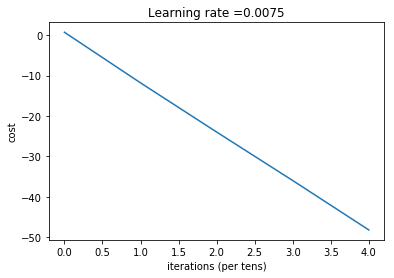

In [0]:
parameters = L_layer_model(train_x, y, layers_dims, num_iterations = 50, print_cost = True)

In [0]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [0]:
pred_train = predict(train_x, y, parameters)

Accuracy: 0.0232729850261378


In [0]:
#pred_test = predict(test_x, test_y, parameters)

In [0]:
## START CODE HERE ##
my_image = "my_image2.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

NameError: ignored